# Data Analysis of Youtube's most popular channel, Mr. Beast
Youtube is one of the most popular services that people across the world use for entertainment. In this proyect, I will explore Mr. Beast's Youtube channel dataset through visualizations using matplotlib and seaborn.

## About the Dataset

The following dataset will be used for the analysis.

https://www.kaggle.com/datasets/robikscube/mrbeast-youtube-stats-daily

This dataset pulls daily stats about the Mr.Beast channel youtube video channels including the view count, comment count, and like counts. You can see how these numbers change over time going back from when the dataset was created. This allows you to track video stats over time.

## Imports for the proyect

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

## Data Preparation and Cleaning

Read the dataset and filter out all the columns that aren't uselful.

In [2]:
df = pd.read_csv('MrBeast_youtube_stats.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110059 entries, 0 to 110058
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            109955 non-null  object 
 1   title                         110059 non-null  object 
 2   description                   109880 non-null  object 
 3   publishTime                   110059 non-null  object 
 4   kind_stats                    109955 non-null  object 
 5   duration_seconds              110059 non-null  int64  
 6   viewCount                     109955 non-null  float64
 7   likeCount                     109870 non-null  float64
 8   commentCount                  109540 non-null  float64
 9   thumbnails.default.url        110059 non-null  object 
 10  thumbnails.default.width      110015 non-null  float64
 11  thumbnails.default.height     110015 non-null  float64
 12  thumbnails.medium.url         110059 non-nul

In [4]:
df = df[['id', 'title', 'publishTime', 'duration_seconds', 'viewCount', 'likeCount', 'commentCount', 'pull_date']]
df

,id,title,publishTime,duration_seconds,viewCount,likeCount,commentCount,pull_date
0,Y4-gFIfGXiQ,Would you go on a Blind Date in Italy?,2023-04-15 20:00:01+00:00,51,162910276.0,9740428.0,15011.0,2023-06-12 00:12:40.045905+00:00
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,2022-11-19 20:59:59+00:00,40,236306082.0,13329100.0,28657.0,2023-06-12 00:12:40.045905+00:00
2,ooAwCOP67GQ,Do Pawnshops Scam You?,2023-06-03 16:59:57+00:00,33,45654763.0,2784509.0,8555.0,2023-06-12 00:12:40.045905+00:00
3,HBMmK1c44sE,I Spent 24 Hours In A Doomsday Bunker,2020-04-11 20:00:00+00:00,719,169750245.0,2905741.0,80976.0,2023-06-12 00:12:40.045905+00:00
4,Rj_vssRaZlQ,I Ate The World’s Largest Slice Of Pizza,2020-08-01 20:00:02+00:00,483,196599378.0,3854742.0,135144.0,2023-06-12 00:12:40.045905+00:00
...,...,...,...,...,...,...,...,...
110054,AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),2015-05-29 20:07:48+00:00,292,18606.0,510.0,117.0,2021-12-24 01:41:03.667334+00:00
110055,RCvnytndd9c,"Last To Leave VR Wins $20,000",2019-06-08 20:00:01+00:00,858,82808860.0,1910890.0,90174.0,2021-12-24 01:41:03.667334+00:00
110056,zi7tZ-2PhLk,How Much Money Do You Make As An Uber Driver??...,2015-05-31 18:31:25+00:00,304,18834.0,372.0,59.0,2021-12-24 01:41:03.667334+00:00
110057,56OkH6ocYZU,L0114R - Biblical Creeper Post for Post @L0114R,2015-05-15 16:48:54+00:00,109,16701.0,432.0,134.0,2021-12-24 01:41:03.667334+00:00


### Checking and removing Null values

In [5]:
df.isnull().sum()

id                  104
title                 0
publishTime           0
duration_seconds      0
viewCount           104
likeCount           189
commentCount        519
pull_date             0
dtype: int64

In [6]:
df[df['id'].isnull()]

,id,title,publishTime,duration_seconds,viewCount,likeCount,commentCount,pull_date
9279,NaN,New Uploads,2022-10-22 19:44:08+00:00,0,NaN,NaN,NaN,2023-05-07 00:11:11.210164+00:00
9534,NaN,New Uploads,2022-10-22 19:44:08+00:00,0,NaN,NaN,NaN,2023-05-06 00:16:15.614776+00:00
9789,NaN,New Uploads,2022-10-22 19:44:08+00:00,0,NaN,NaN,NaN,2023-05-05 00:17:45.511813+00:00
17200,NaN,MrBeast,2012-02-20 00:43:50+00:00,0,NaN,NaN,NaN,2023-04-05 00:19:02.361915+00:00
17458,NaN,MrBeast,2012-02-20 00:43:50+00:00,0,NaN,NaN,NaN,2023-04-04 00:12:05.262040+00:00
...,...,...,...,...,...,...,...,...
109266,NaN,MrBeast,2012-02-20 00:43:50+00:00,0,NaN,NaN,NaN,2021-12-24 02:16:53.157735+00:00
109320,NaN,MrBeast,2012-02-20 00:43:50+00:00,0,NaN,NaN,NaN,2021-12-24 02:03:09.197822+00:00
109563,NaN,MrBeast,2012-02-20 00:43:50+00:00,0,NaN,NaN,NaN,2021-12-24 02:03:09.197822+00:00
109800,NaN,MrBeast,2012-02-20 00:43:50+00:00,0,NaN,NaN,NaN,2021-12-24 01:53:57.197204+00:00


 All the columns where the ID is NaN are filtered out.

In [7]:
df = df[~df['id'].isnull()]

In [8]:
df.isnull().sum()

id                    0
title                 0
publishTime           0
duration_seconds      0
viewCount             0
likeCount            85
commentCount        415
pull_date             0
dtype: int64

In [9]:
df[df['commentCount'].isnull()]

,id,title,publishTime,duration_seconds,viewCount,likeCount,commentCount,pull_date
245,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,52344461.0,2574244.0,NaN,2023-06-12 00:12:40.045905+00:00
496,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,52341061.0,2574133.0,NaN,2023-06-11 00:12:17.366349+00:00
746,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,52338369.0,2573997.0,NaN,2023-06-10 00:12:13.290526+00:00
997,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,52335849.0,2573902.0,NaN,2023-06-09 00:15:17.427235+00:00
1250,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,52333055.0,2573802.0,NaN,2023-06-08 00:14:16.588315+00:00
...,...,...,...,...,...,...,...,...
109042,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,41760519.0,1985740.0,NaN,2021-12-24 06:11:36.043167+00:00
109289,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,41747511.0,1984599.0,NaN,2021-12-24 02:16:53.157735+00:00
109536,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,41746916.0,1984538.0,NaN,2021-12-24 02:03:09.197822+00:00
109783,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12+00:00,36001,41746716.0,1984500.0,NaN,2021-12-24 01:53:57.197204+00:00


In [10]:
df[df['likeCount'].isnull()]

,id,title,publishTime,duration_seconds,viewCount,likeCount,commentCount,pull_date
8056,jP82d277Cc8,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,2012-03-09 23:29:03+00:00,239,3239179.0,NaN,7321.0,2023-05-11 00:19:46.104335+00:00
10812,QicO1Gd0kvU,Pokemon online battle #4 [uu] Same old team,2013-03-28 17:22:43+00:00,279,126681.0,NaN,929.0,2023-04-30 00:13:56.406575+00:00
43988,jP82d277Cc8,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,2012-03-09 23:29:03+00:00,239,2888993.0,NaN,6936.0,2022-12-23 00:23:39.145752+00:00
44252,jP82d277Cc8,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,2012-03-09 23:29:03+00:00,239,2886315.0,NaN,6932.0,2022-12-22 00:19:04.828599+00:00
44395,jP82d277Cc8,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,2012-03-09 23:29:03+00:00,239,2883163.0,NaN,6929.0,2022-12-21 00:23:43.017012+00:00
...,...,...,...,...,...,...,...,...
108791,IAbX0FwX-GY,Why I Haven&#39;t Been Uploading,2013-03-25 20:10:38+00:00,363,369541.0,NaN,1323.0,2021-12-31 03:24:28.131427+00:00
109032,IAbX0FwX-GY,Why I Haven&#39;t Been Uploading,2013-03-25 20:10:38+00:00,363,366410.0,NaN,1317.0,2021-12-24 06:11:36.043167+00:00
109279,IAbX0FwX-GY,Why I Haven&#39;t Been Uploading,2013-03-25 20:10:38+00:00,363,366335.0,NaN,1317.0,2021-12-24 02:16:53.157735+00:00
109773,IAbX0FwX-GY,Why I Haven&#39;t Been Uploading,2013-03-25 20:10:38+00:00,363,366328.0,NaN,1317.0,2021-12-24 01:53:57.197204+00:00


Based on the above, we can conclude that the columns 'likeCount' and 'commentCount' that are NaN correspond to videos where the comments or likes are disabled. It is proceeded to fill this values with 0.

In [11]:
df = df.fillna(0)
df

,id,title,publishTime,duration_seconds,viewCount,likeCount,commentCount,pull_date
0,Y4-gFIfGXiQ,Would you go on a Blind Date in Italy?,2023-04-15 20:00:01+00:00,51,162910276.0,9740428.0,15011.0,2023-06-12 00:12:40.045905+00:00
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,2022-11-19 20:59:59+00:00,40,236306082.0,13329100.0,28657.0,2023-06-12 00:12:40.045905+00:00
2,ooAwCOP67GQ,Do Pawnshops Scam You?,2023-06-03 16:59:57+00:00,33,45654763.0,2784509.0,8555.0,2023-06-12 00:12:40.045905+00:00
3,HBMmK1c44sE,I Spent 24 Hours In A Doomsday Bunker,2020-04-11 20:00:00+00:00,719,169750245.0,2905741.0,80976.0,2023-06-12 00:12:40.045905+00:00
4,Rj_vssRaZlQ,I Ate The World’s Largest Slice Of Pizza,2020-08-01 20:00:02+00:00,483,196599378.0,3854742.0,135144.0,2023-06-12 00:12:40.045905+00:00
...,...,...,...,...,...,...,...,...
110054,AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),2015-05-29 20:07:48+00:00,292,18606.0,510.0,117.0,2021-12-24 01:41:03.667334+00:00
110055,RCvnytndd9c,"Last To Leave VR Wins $20,000",2019-06-08 20:00:01+00:00,858,82808860.0,1910890.0,90174.0,2021-12-24 01:41:03.667334+00:00
110056,zi7tZ-2PhLk,How Much Money Do You Make As An Uber Driver??...,2015-05-31 18:31:25+00:00,304,18834.0,372.0,59.0,2021-12-24 01:41:03.667334+00:00
110057,56OkH6ocYZU,L0114R - Biblical Creeper Post for Post @L0114R,2015-05-15 16:48:54+00:00,109,16701.0,432.0,134.0,2021-12-24 01:41:03.667334+00:00


In [12]:
df.isnull().sum()

id                  0
title               0
publishTime         0
duration_seconds    0
viewCount           0
likeCount           0
commentCount        0
pull_date           0
dtype: int64

At the end, the dataframe is clean of null values.

### String splitting and datetime formatting

Splitting the dates for further formatting.

In [13]:
s = df['publishTime'].str.split('+', expand = True)
s[0]

0         2023-04-15 20:00:01
1         2022-11-19 20:59:59
2         2023-06-03 16:59:57
3         2020-04-11 20:00:00
4         2020-08-01 20:00:02
                 ...         
110054    2015-05-29 20:07:48
110055    2019-06-08 20:00:01
110056    2015-05-31 18:31:25
110057    2015-05-15 16:48:54
110058    2018-07-11 21:16:00
Name: 0, Length: 109955, dtype: object

In [14]:
df['publishTime'] = s[0]
df

,id,title,publishTime,duration_seconds,viewCount,likeCount,commentCount,pull_date
0,Y4-gFIfGXiQ,Would you go on a Blind Date in Italy?,2023-04-15 20:00:01,51,162910276.0,9740428.0,15011.0,2023-06-12 00:12:40.045905+00:00
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,2022-11-19 20:59:59,40,236306082.0,13329100.0,28657.0,2023-06-12 00:12:40.045905+00:00
2,ooAwCOP67GQ,Do Pawnshops Scam You?,2023-06-03 16:59:57,33,45654763.0,2784509.0,8555.0,2023-06-12 00:12:40.045905+00:00
3,HBMmK1c44sE,I Spent 24 Hours In A Doomsday Bunker,2020-04-11 20:00:00,719,169750245.0,2905741.0,80976.0,2023-06-12 00:12:40.045905+00:00
4,Rj_vssRaZlQ,I Ate The World’s Largest Slice Of Pizza,2020-08-01 20:00:02,483,196599378.0,3854742.0,135144.0,2023-06-12 00:12:40.045905+00:00
...,...,...,...,...,...,...,...,...
110054,AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),2015-05-29 20:07:48,292,18606.0,510.0,117.0,2021-12-24 01:41:03.667334+00:00
110055,RCvnytndd9c,"Last To Leave VR Wins $20,000",2019-06-08 20:00:01,858,82808860.0,1910890.0,90174.0,2021-12-24 01:41:03.667334+00:00
110056,zi7tZ-2PhLk,How Much Money Do You Make As An Uber Driver??...,2015-05-31 18:31:25,304,18834.0,372.0,59.0,2021-12-24 01:41:03.667334+00:00
110057,56OkH6ocYZU,L0114R - Biblical Creeper Post for Post @L0114R,2015-05-15 16:48:54,109,16701.0,432.0,134.0,2021-12-24 01:41:03.667334+00:00


In [15]:
s = df['pull_date'].str.split(' ', expand = True)
s

,0,1
0,2023-06-12,00:12:40.045905+00:00
1,2023-06-12,00:12:40.045905+00:00
2,2023-06-12,00:12:40.045905+00:00
3,2023-06-12,00:12:40.045905+00:00
4,2023-06-12,00:12:40.045905+00:00
...,...,...
110054,2021-12-24,01:41:03.667334+00:00
110055,2021-12-24,01:41:03.667334+00:00
110056,2021-12-24,01:41:03.667334+00:00
110057,2021-12-24,01:41:03.667334+00:00


In [16]:
df['pull_date'] = s[0]
df

,id,title,publishTime,duration_seconds,viewCount,likeCount,commentCount,pull_date
0,Y4-gFIfGXiQ,Would you go on a Blind Date in Italy?,2023-04-15 20:00:01,51,162910276.0,9740428.0,15011.0,2023-06-12
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,2022-11-19 20:59:59,40,236306082.0,13329100.0,28657.0,2023-06-12
2,ooAwCOP67GQ,Do Pawnshops Scam You?,2023-06-03 16:59:57,33,45654763.0,2784509.0,8555.0,2023-06-12
3,HBMmK1c44sE,I Spent 24 Hours In A Doomsday Bunker,2020-04-11 20:00:00,719,169750245.0,2905741.0,80976.0,2023-06-12
4,Rj_vssRaZlQ,I Ate The World’s Largest Slice Of Pizza,2020-08-01 20:00:02,483,196599378.0,3854742.0,135144.0,2023-06-12
...,...,...,...,...,...,...,...,...
110054,AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),2015-05-29 20:07:48,292,18606.0,510.0,117.0,2021-12-24
110055,RCvnytndd9c,"Last To Leave VR Wins $20,000",2019-06-08 20:00:01,858,82808860.0,1910890.0,90174.0,2021-12-24
110056,zi7tZ-2PhLk,How Much Money Do You Make As An Uber Driver??...,2015-05-31 18:31:25,304,18834.0,372.0,59.0,2021-12-24
110057,56OkH6ocYZU,L0114R - Biblical Creeper Post for Post @L0114R,2015-05-15 16:48:54,109,16701.0,432.0,134.0,2021-12-24


In [17]:
df.dtypes

id                   object
title                object
publishTime          object
duration_seconds      int64
viewCount           float64
likeCount           float64
commentCount        float64
pull_date            object
dtype: object

Changing the variables from string to datetime format.

In [18]:
df['pull_date'] = pd.to_datetime(df['pull_date'])
df['publishTime'] = pd.to_datetime(df['publishTime'], format='%Y-%m-%d %H:%M:%S')
df.dtypes

id                          object
title                       object
publishTime         datetime64[ns]
duration_seconds             int64
viewCount                  float64
likeCount                  float64
commentCount               float64
pull_date           datetime64[ns]
dtype: object

### Renaming titles for better access

In [19]:
df = df.rename(columns={'id': 'video_id','publishTime': 'publish_time', 'viewCount': 'view_count', 'likeCount': 'like_count', 'commentCount': 'comment_count'})
df

,video_id,title,publish_time,duration_seconds,view_count,like_count,comment_count,pull_date
0,Y4-gFIfGXiQ,Would you go on a Blind Date in Italy?,2023-04-15 20:00:01,51,162910276.0,9740428.0,15011.0,2023-06-12
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,2022-11-19 20:59:59,40,236306082.0,13329100.0,28657.0,2023-06-12
2,ooAwCOP67GQ,Do Pawnshops Scam You?,2023-06-03 16:59:57,33,45654763.0,2784509.0,8555.0,2023-06-12
3,HBMmK1c44sE,I Spent 24 Hours In A Doomsday Bunker,2020-04-11 20:00:00,719,169750245.0,2905741.0,80976.0,2023-06-12
4,Rj_vssRaZlQ,I Ate The World’s Largest Slice Of Pizza,2020-08-01 20:00:02,483,196599378.0,3854742.0,135144.0,2023-06-12
...,...,...,...,...,...,...,...,...
110054,AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),2015-05-29 20:07:48,292,18606.0,510.0,117.0,2021-12-24
110055,RCvnytndd9c,"Last To Leave VR Wins $20,000",2019-06-08 20:00:01,858,82808860.0,1910890.0,90174.0,2021-12-24
110056,zi7tZ-2PhLk,How Much Money Do You Make As An Uber Driver??...,2015-05-31 18:31:25,304,18834.0,372.0,59.0,2021-12-24
110057,56OkH6ocYZU,L0114R - Biblical Creeper Post for Post @L0114R,2015-05-15 16:48:54,109,16701.0,432.0,134.0,2021-12-24


### Deleting all the duplicates

In [20]:
df = df[~df.duplicated()]

## Exploratory Analysis and Visualization

With the clean dataset, it is now posible to retrieve information to answer questions.

### What are the top 10 most watched videos ?

Start by creating the latest date dataframe. This dataframe corresponds to the latest date where data was pulled from from Mr. Beast's channel.

In [21]:
df_latest_date = df[df['pull_date']=='2023-06-12']
df_latest_date

,video_id,title,publish_time,duration_seconds,view_count,like_count,comment_count,pull_date
0,Y4-gFIfGXiQ,Would you go on a Blind Date in Italy?,2023-04-15 20:00:01,51,162910276.0,9740428.0,15011.0,2023-06-12
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,2022-11-19 20:59:59,40,236306082.0,13329100.0,28657.0,2023-06-12
2,ooAwCOP67GQ,Do Pawnshops Scam You?,2023-06-03 16:59:57,33,45654763.0,2784509.0,8555.0,2023-06-12
3,HBMmK1c44sE,I Spent 24 Hours In A Doomsday Bunker,2020-04-11 20:00:00,719,169750245.0,2905741.0,80976.0,2023-06-12
4,Rj_vssRaZlQ,I Ate The World’s Largest Slice Of Pizza,2020-08-01 20:00:02,483,196599378.0,3854742.0,135144.0,2023-06-12
...,...,...,...,...,...,...,...,...
245,AS5CxLCWq-Q,Watching Dance Till You&#39;re Dead For 10 Hours,2017-03-21 22:40:12,36001,52344461.0,2574244.0,0.0,2023-06-12
246,xWcldHxHFpo,"I Counted To 100,000!",2017-01-09 00:00:39,85687,28324500.0,1363616.0,125458.0,2023-06-12
247,KzwTYZ2W3ZA,Microwaving A Microwave,2016-12-09 02:45:18,604,11227583.0,431065.0,42192.0,2023-06-12
248,bTrV5v7GLcQ,"Last To Leave Pool Of $20,000 Keeps It",2019-08-24 20:00:01,999,151519818.0,2972670.0,83121.0,2023-06-12


Filtering the top 10 videos by view count.

In [22]:
df_top = df_latest_date.sort_values(by= 'view_count', ascending=False).head(10)
df_top

,video_id,title,publish_time,duration_seconds,view_count,like_count,comment_count,pull_date
27,se50viFJ0AQ,Would You Fly To Paris For A Baguette?,2022-12-08 20:12:27,48,771105085.0,35551142.0,73447.0,2023-06-12
26,YlvcFJOE-OE,Giving iPhones Instead Of Candy on Halloween,2022-11-02 21:00:01,40,667371260.0,24495041.0,94830.0,2023-06-12
13,S_CUEOBZ0P4,"The Rock Vs MrBeast For $100,000",2022-10-21 20:00:06,55,330839391.0,21514679.0,57598.0,2023-06-12
96,r7zJ8srwwjk,I Spent 50 Hours In Solitary Confinement,2020-05-30 20:10:08,952,271324229.0,4490633.0,116586.0,2023-06-12
40,9bqk6ZUsKyA,I Spent 50 Hours Buried Alive,2021-03-27 20:00:04,760,265789656.0,7547027.0,250747.0,2023-06-12
53,GLoeAJUcz38,"Press This Button To Win $100,000!",2020-11-14 21:00:02,911,252643050.0,4018631.0,91547.0,2023-06-12
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,2022-11-19 20:59:59,40,236306082.0,13329100.0,28657.0,2023-06-12
106,iogcY_4xGjo,"$1 vs $1,000,000 Hotel Room!",2022-10-22 21:00:00,941,235533287.0,5933443.0,113783.0,2023-06-12
85,fMfipiV_17o,"Would You Sit In Snakes For $10,000?",2021-04-10 21:00:07,849,230571872.0,4827599.0,142274.0,2023-06-12
124,QxGVgXf_LNk,"Going Through The Same Drive Thru 1,000 Times",2019-10-05 20:00:08,938,224797708.0,4471603.0,132154.0,2023-06-12


Plotting with the top values.

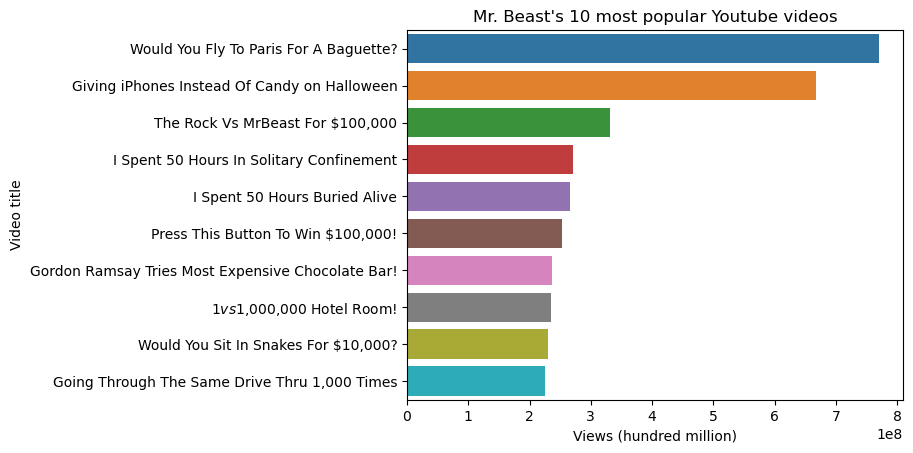

In [23]:
top_10_views_graph = sns.barplot(data=df_top, x='view_count', y= 'title')
top_10_views_graph.set_xlabel('Views (hundred million)')
top_10_views_graph.set_ylabel('Video title')
top_10_views_graph.set_title('Mr. Beast\'s 10 most popular Youtube videos')
plt.show()

The above infromation gives an interesting result, the channel's top performing videos correspond to Youtube Shorts. This is a special type of video that has a lenght no longer than 60 seconds and are usually ment to be watched on mobile.

## Regular videos vs shorts

Now that is known that the channel's most watched videos are Shorts, lets compare their average performance metrics.


Start by creating a dataframe of all the Shorts videos, this ones correspond to all the videos that have less than or equal to 60 second duration and are also created after the Youtube Short's launch.

In [24]:
shorts_release_date = np.datetime64('2021-07-13')
df_shorts = df_latest_date[(df_latest_date['duration_seconds'] <= 60) & (df_latest_date['publish_time'] >= shorts_release_date)]
df_shorts

,video_id,title,publish_time,duration_seconds,view_count,like_count,comment_count,pull_date
0,Y4-gFIfGXiQ,Would you go on a Blind Date in Italy?,2023-04-15 20:00:01,51,162910276.0,9740428.0,15011.0,2023-06-12
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,2022-11-19 20:59:59,40,236306082.0,13329100.0,28657.0,2023-06-12
2,ooAwCOP67GQ,Do Pawnshops Scam You?,2023-06-03 16:59:57,33,45654763.0,2784509.0,8555.0,2023-06-12
8,Y0cBiGUuB1Y,I Sent a Subscriber to Disneyland,2023-03-30 20:00:00,27,195460696.0,12695659.0,37621.0,2023-06-12
13,S_CUEOBZ0P4,"The Rock Vs MrBeast For $100,000",2022-10-21 20:00:06,55,330839391.0,21514679.0,57598.0,2023-06-12
26,YlvcFJOE-OE,Giving iPhones Instead Of Candy on Halloween,2022-11-02 21:00:01,40,667371260.0,24495041.0,94830.0,2023-06-12
27,se50viFJ0AQ,Would You Fly To Paris For A Baguette?,2022-12-08 20:12:27,48,771105085.0,35551142.0,73447.0,2023-06-12
32,lglIQkCHO0g,Do Men Lie About Their Height?,2023-02-14 21:00:14,47,167650209.0,9400119.0,20374.0,2023-06-12
70,GGBy50KtvRk,Tipping A Waitress A Car,2023-04-22 20:00:00,38,130001456.0,8662350.0,24446.0,2023-06-12


To make the analysis of the averages fair, the long videos are taken from a time period that matches the short ones.

In [25]:
df_comparison = df_latest_date[(df_latest_date['duration_seconds'] >= 60) & 
                               (df_latest_date['publish_time'] >= df_shorts['publish_time'].min())]
df_comparison

,video_id,title,publish_time,duration_seconds,view_count,like_count,comment_count,pull_date
12,WTOm65IZneg,"1,000 Deaf People Hear For The First Time",2023-05-06 19:59:59,374,84153380.0,4380112.0,154264.0,2023-06-12
34,h5NvTTOlOtI,Hydraulic Press Vs Lamborghini,2022-12-10 21:00:01,625,167385082.0,5093365.0,132250.0,2023-06-12
37,1WEAJ-DFkHE,"$1 vs $500,000 Plane Ticket!",2023-04-01 20:00:04,740,181475234.0,5527680.0,157915.0,2023-06-12
55,TJ2ifmkGGus,"1,000 Blind People See For The First Time",2023-01-28 21:00:00,481,145517607.0,9691108.0,402075.0,2023-06-12
63,YLt73w6criQ,I Paid A Real Assassin To Try To Kill Me,2023-03-18 20:00:01,737,147748358.0,4709417.0,111473.0,2023-06-12
77,0CTp1a-aCUM,"100 Kids Vs 100 Adults For $500,000",2022-12-03 21:00:00,923,164185382.0,3736983.0,95720.0,2023-06-12
79,7IKab3HcfFk,I Survived 50 Hours In Antarctica,2022-12-24 20:59:59,730,121113329.0,4404356.0,151336.0,2023-06-12
106,iogcY_4xGjo,"$1 vs $1,000,000 Hotel Room!",2022-10-22 21:00:00,941,235533287.0,5933443.0,113783.0,2023-06-12
119,48h57PspBec,"$1 vs $1,000,000,000 Yacht!",2023-06-10 16:00:00,887,52752005.0,2856214.0,85118.0,2023-06-12


Creating the average metrics dataframe to later make the Pie Charts.

In [26]:
shorts_avg_arr = np.array([df_shorts['view_count'].mean(),df_shorts['like_count'].mean(),df_shorts['comment_count'].mean()]).round()
longv_avg_arr = np.array([df_comparison['view_count'].mean(),df_comparison['like_count'].mean(),df_comparison['comment_count'].mean()]).round()
data = {'shorts': shorts_avg_arr, 'long_videos': longv_avg_arr}
df_avg = pd.DataFrame(data=data, index=['avg_view_count', 'avg_like_count', 'avg_comment_count'])
df_avg



,shorts,long_videos
avg_view_count,300811024.0,144429296.0
avg_like_count,15352559.0,5148075.0
avg_comment_count,40060.0,155993.0


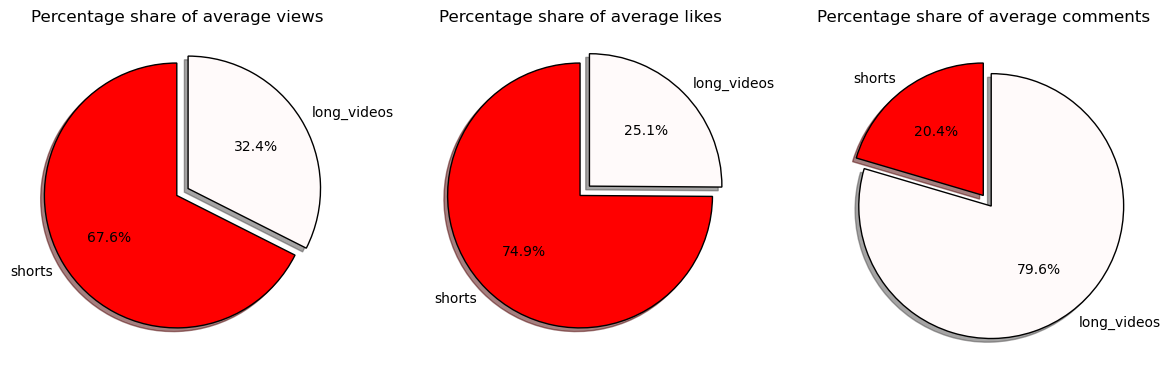

In [27]:
fig, axs = plt.subplots(1, 3, figsize = (12,6))

labels = df_avg.columns
values = df_avg.values

for i in range(3):
    axs[i].pie(values[i], labels=labels, autopct= '%1.1f%%', startangle=90, 
           colors=['red','snow'], shadow=True, explode=(0, 0.1), 
           wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
    
axs[0].set_title('Percentage share of average views')        
axs[1].set_title('Percentage share of average likes')
axs[2].set_title('Percentage share of average comments')


plt.tight_layout()
plt.show()

With this results it is concluded that on average the short videos perform better than long ones on views and likes, but recieve less comments.

### Is the lenght of videos related to their views ?

For the sake of not skewing the results, it will only be considered the videos that have above 1 million views, since the mayority of low view count videos correspond to ones that were created more than 7 years ago and dont fit the channel's current content. Also, Short's won't be considered for this measure.

Filtering by video lenght and view count.

In [28]:
df_longpv = df_latest_date[(df_latest_date['duration_seconds'] >= 60) & (df_latest_date['view_count'] > 1000000)]
df_longpv['duration_seconds'].sort_values(ascending=False).head(10)

246    85687
244    84878
242    42520
243    36011
245    36001
239    12581
196     1680
186     1479
172     1445
185     1382
Name: duration_seconds, dtype: int64

The first 6 longest videos won't be considered because they are outliers.

In [29]:
df_longpv = df_longpv.sort_values(by='duration_seconds', ascending=False)
df_longvdur = df_longpv[6:]

In [30]:
df_longvdur['duration_seconds'].sort_values(ascending=False)


196    1680
186    1479
172    1445
185    1382
188    1322
       ... 
11      157
36      157
64      131
54      128
219     110
Name: duration_seconds, Length: 180, dtype: int64

Plotting the data.

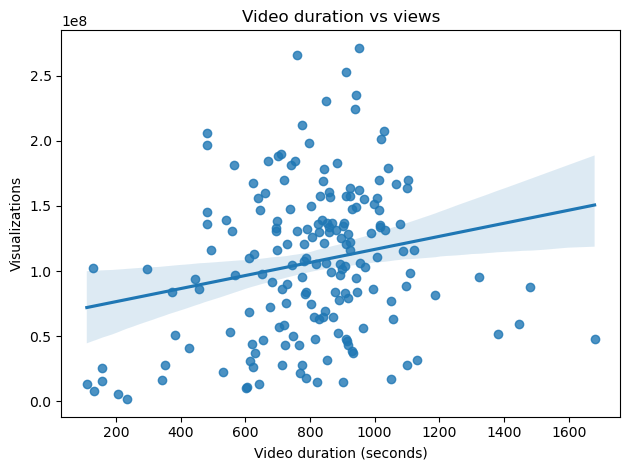

LinregressResult(slope=50122.06500144256, intercept=66566639.43087197, rvalue=0.20922911024829274, pvalue=0.004820137822665516, stderr=17558.05800949814, intercept_stderr=14696876.114981258)

In [31]:
reg_plot = sns.regplot(x='duration_seconds', y='view_count', fit_reg=True, data=df_longvdur)
reg_plot.set_xlabel('Video duration (seconds)')
reg_plot.set_ylabel('Visualizations')
reg_plot.set_title('Video duration vs views')
plt.tight_layout()
plt.show()
linregress(df_longvdur['duration_seconds'], df_longvdur['view_count'])

From the plot and statistical results above, it is concluded that video duration isn't directly related to it's success.

### How long are Mr. Beast's popular videos ?


For the same reasons as in a previous analysis, only videos with more than a million views will be considered.

Extracting the hour from the datetime format and plotting.

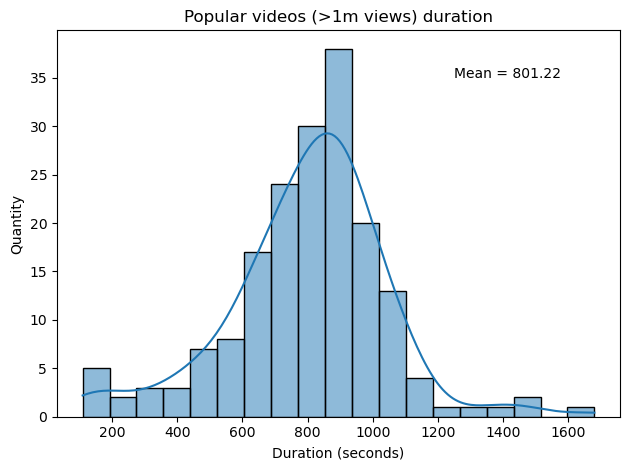

In [32]:
#Prevent SettingWithCopyWarning
df_latest_date_copy = df_latest_date.copy()
df_latest_date_copy['publish_hour'] = df_latest_date_copy['publish_time'].dt.hour

hist_vduration = sns.histplot(data=df_longvdur, x='duration_seconds', kde=True)
hist_vduration.set_title('Popular videos (>1m views) duration')
hist_vduration.set_xlabel('Duration (seconds)')
hist_vduration.set_ylabel('Quantity')
plt.text(1250, 35, 'Mean = {:.2f}'.format(df_longvdur['duration_seconds'].mean()))
plt.tight_layout()
plt.show()

The lenght of his videos is usually between 10 and 15 minutes, with the mean at around 13 minutes.

### Is there a relationship between the publish time of a video and its performance metrics?


First let's see the channel's uploading schedule.

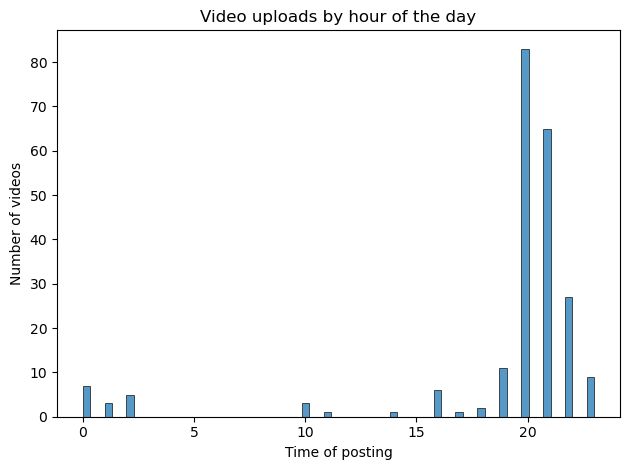

In [33]:
hist_ph = sns.histplot(data=df_latest_date_copy, x='publish_hour')
hist_ph.set_title('Video uploads by hour of the day')
hist_ph.set_xlabel('Time of posting')
hist_ph.set_ylabel('Number of videos')
plt.tight_layout()
plt.show()

The channel usually posts between 8 and 9 pm.

Determine that start date of the pulling of the data and making a copy of the main dataframe to create the 'publish_hour' column.

In [34]:
start_pulldate = df['pull_date'].min()
start_pulldate


Timestamp('2021-12-24 00:00:00')

Extracting the hour from datetime variable and making a new column.

In [35]:
df_copy = df.copy()
df_copy['publish_date'] = df['publish_time'].dt.date
df_copy['publish_date'] = pd.to_datetime(df_copy['publish_date'], infer_datetime_format=True)
df_copy['publish_time'] = df['publish_time'].dt.hour
df_copy

,video_id,title,publish_time,duration_seconds,view_count,like_count,comment_count,pull_date,publish_date
0,Y4-gFIfGXiQ,Would you go on a Blind Date in Italy?,20,51,162910276.0,9740428.0,15011.0,2023-06-12,2023-04-15
1,FD-0KG-h2-c,Gordon Ramsay Tries Most Expensive Chocolate Bar!,20,40,236306082.0,13329100.0,28657.0,2023-06-12,2022-11-19
2,ooAwCOP67GQ,Do Pawnshops Scam You?,16,33,45654763.0,2784509.0,8555.0,2023-06-12,2023-06-03
3,HBMmK1c44sE,I Spent 24 Hours In A Doomsday Bunker,20,719,169750245.0,2905741.0,80976.0,2023-06-12,2020-04-11
4,Rj_vssRaZlQ,I Ate The World’s Largest Slice Of Pizza,20,483,196599378.0,3854742.0,135144.0,2023-06-12,2020-08-01
...,...,...,...,...,...,...,...,...,...
110050,HuLAAXZXIy0,This Kid Should Quit COD....,21,77,35249.0,788.0,140.0,2021-12-24,2014-06-02
110051,NiqkH7qVW0U,100k Subs With No Videos????,16,257,379210.0,7546.0,2849.0,2021-12-24,2015-04-11
110054,AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),20,292,18606.0,510.0,117.0,2021-12-24,2015-05-29
110055,RCvnytndd9c,"Last To Leave VR Wins $20,000",20,858,82808860.0,1910890.0,90174.0,2021-12-24,2019-06-08


Making the columns into list's so we can intersect them and get the videos that are published at the same date when the data was pulled, allowing us to extract it's performance metrics from the next day.

In [36]:
arr1 = df_copy['pull_date']
arr2 = df_copy['publish_date']
intersect = np.intersect1d(arr1, arr2)
intersect

array(['2022-01-29T00:00:00.000000000', '2022-03-19T00:00:00.000000000',
       '2022-04-09T00:00:00.000000000', '2022-08-20T00:00:00.000000000',
       '2022-09-03T00:00:00.000000000', '2022-09-24T00:00:00.000000000',
       '2022-10-21T00:00:00.000000000', '2022-10-22T00:00:00.000000000',
       '2022-11-02T00:00:00.000000000', '2022-11-12T00:00:00.000000000',
       '2022-11-19T00:00:00.000000000', '2022-12-03T00:00:00.000000000',
       '2022-12-08T00:00:00.000000000', '2022-12-10T00:00:00.000000000',
       '2022-12-24T00:00:00.000000000', '2023-01-28T00:00:00.000000000',
       '2023-02-14T00:00:00.000000000', '2023-03-18T00:00:00.000000000',
       '2023-03-30T00:00:00.000000000', '2023-04-01T00:00:00.000000000',
       '2023-04-15T00:00:00.000000000', '2023-04-22T00:00:00.000000000',
       '2023-05-01T00:00:00.000000000', '2023-05-06T00:00:00.000000000',
       '2023-05-27T00:00:00.000000000', '2023-06-03T00:00:00.000000000',
       '2023-06-10T00:00:00.000000000'], dtype='dat

This array show's all the dates where a video was published and there's a data for the following day.

Making list's of the first day views and the publish hour of the video to then plot.

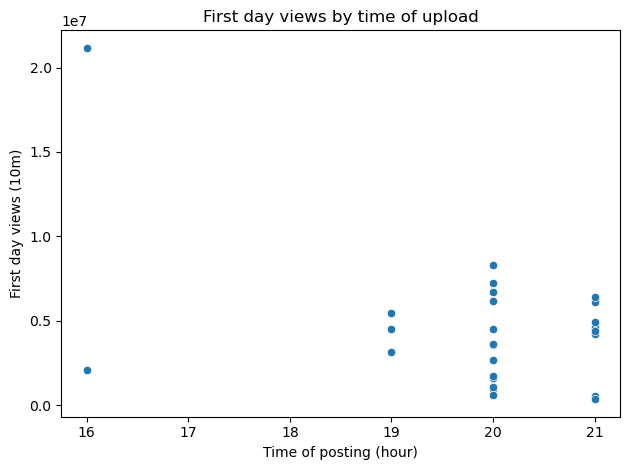

In [37]:
fd_views = []
publish_hour = []

for i in range(len(intersect)):
    fd_views.append(df_copy[(df_copy['publish_date']==intersect[i])].iloc[-1]['view_count'])
    publish_hour.append(df_copy[(df_copy['publish_date']==intersect[i])].iloc[-1]['publish_time'])

fd_perf_scp= sns.scatterplot(x=publish_hour, y=fd_views)
fd_perf_scp.set_title('First day views by time of upload')
fd_perf_scp.set_xlabel('Time of posting (hour)')
fd_perf_scp.set_ylabel('First day views (10m)')
plt.tight_layout()
plt.show()

To have a better understanding of this data we'll calculate the mean of views for each hour that a video was posted.

In [38]:
# Making a dataframe to use the groupby function
df_fdv = pd.DataFrame({'publish_hour': publish_hour, 'fd_views': fd_views})
hourly_average_views = round(df_fdv.groupby('publish_hour')['fd_views'].mean())
hourly_average_views

publish_hour
16    11622358.0
19     4401469.0
20     3756224.0
21     3977429.0
Name: fd_views, dtype: float64

Not taking into consideration the 2 datapoints at 4pm, it is concluded that between 7pm and 9pm (usual upload schedule) there isn't a substancial difference in the views the video gets the first day.

### Most popular videos views over time

Selecting the number of videos to be displayed in the plot, and extracting their title.

In [39]:
n=5
df_top_views = df_latest_date[df_latest_date['publish_time']>start_pulldate].sort_values(by='view_count', ascending=False).head(n)
mvv_title = df_top_views['title'].tolist()

Iterating through the lists to get the points that make up the plot.

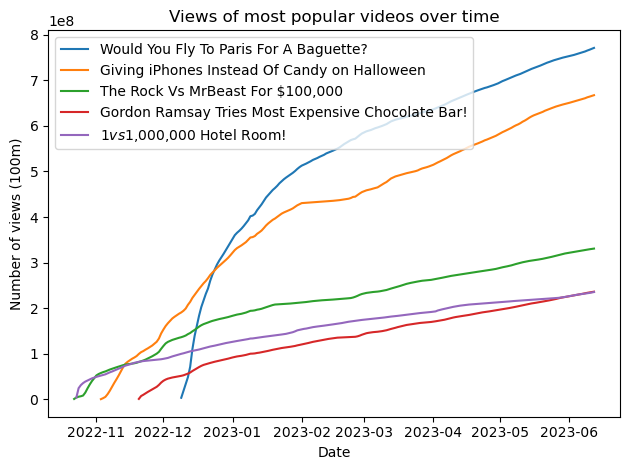

In [40]:
lists = [[] for _ in range(n)]
lists2 = [[] for _ in range(n)]

for i in range(n):
    lists[i] = df[df['title']==mvv_title[i]]['pull_date'].tolist()
    lists2[i] = df[df['title']==mvv_title[i]]['view_count'].tolist()
    views_plot = plt.plot(lists[i], lists2[i], label=mvv_title[i])

plt.title('Views of most popular videos over time')
plt.xlabel('Date')
plt.ylabel('Number of views (100m)')
plt.legend()    
plt.tight_layout()
plt.show()
    

## Final thoughts

In conclusion, the data analysis of Mr. Beast's YouTube channel revealed valuable insights despite the limitations of missing data and inconsistent pull dates. It was found that YouTube Shorts generate more views compared to regular videos, and the majority of videos have an average duration of around 13 minutes. Interestingly, the analysis indicated that views were not directly related with the upload time of the videos. To obtain a more in-depth analysis, access to additional data such as video retention, demographics, and country-specific information would be necessary. Overall, this project provided significant findings and highlighted the need of private data for a thorough examination of the channel.